In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from app.models import Participant
from app import app
from scipy.stats import pearsonr

In [2]:
with app.app_context():
    df = pd.DataFrame([{'name': p.name, 'filename': r.filename, 'response': r.response, 'RT': r.response_time}
                       for p in Participant.query.all() for r in p.images]).dropna()

In [3]:
names = df.groupby('name').count()
names = list(names[names.response < 50 | names.index.str.endswith('DEL')].index.values)
names.extend(['Maksymilian Martys', 'Thijs'])
df = df[~df.name.isin(names)]
df = df.merge(pd.read_csv('app/static/data.csv', index_col=0))

In [4]:
df

,name,filename,response,RT,environment,width,shoulder,lanes
0,Pablo,159.png,70.0,19588.298884,urban,8.3,0.0,2
1,Bouke,159.png,70.0,41515.547705,urban,8.3,0.0,2
2,Inga,159.png,50.0,9292.665690,urban,8.3,0.0,2
3,Simen,159.png,50.0,9513.599486,urban,8.3,0.0,2
4,Ewa,159.png,70.0,9171.738974,urban,8.3,0.0,2
...,...,...,...,...,...,...,...,...
2095,Mehr,203.png,90.0,17274.986064,suburban,10.6,0.0,1
2096,Amir,203.png,100.0,11645.902817,suburban,10.6,0.0,1
2097,Vincent,160.png,50.0,13492.620722,urban,7.0,0.0,1
2098,Mj,160.png,40.0,10847.849293,urban,7.0,0.0,1


urban    r=-0.213 (p=4.756e-07)
highway  r= 0.163 (p=0.0001512)
nature   r= 0.055 (p=0.2146)
suburban r=-0.158 (p=0.0003661)


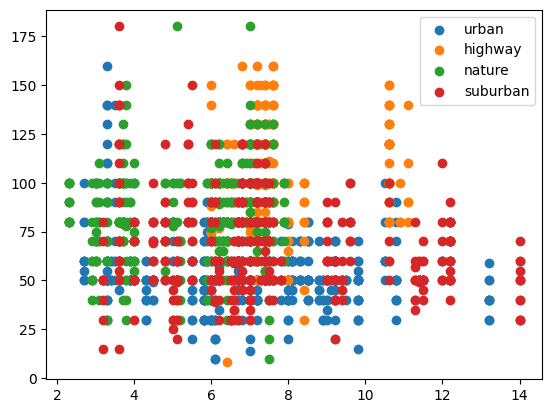

In [5]:
for env in df.environment.unique():
    x = df[df.environment == env]
    r = pearsonr(x.width, x.response)
    print(f"{env:8} r={r.statistic:6.3} (p={r.pvalue:.4})")
    plt.scatter(x.width, x.response, label=env)
plt.legend()
plt.show()

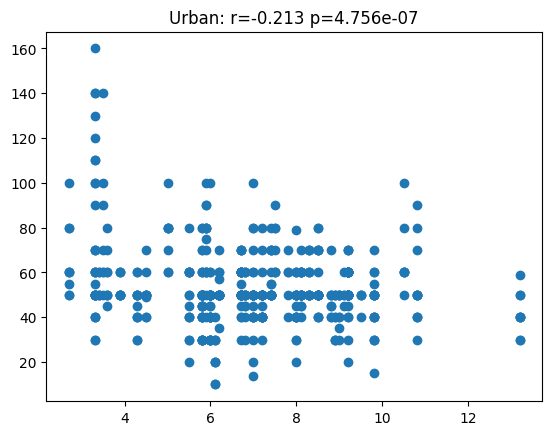

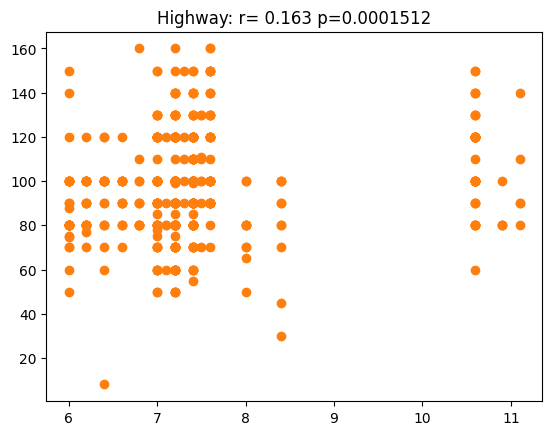

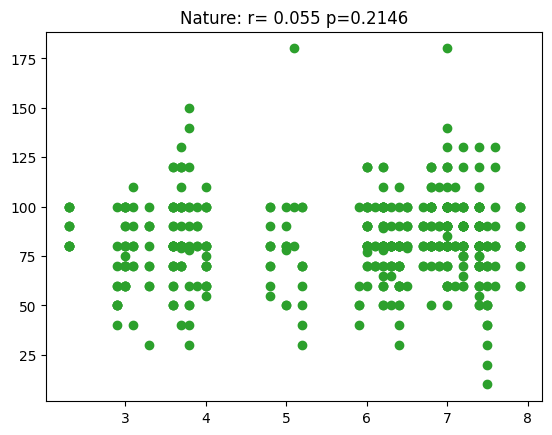

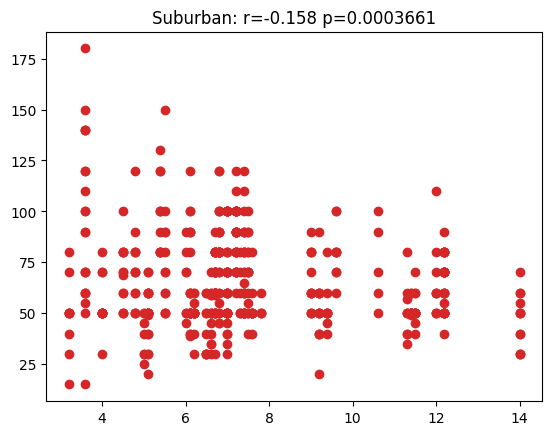

In [6]:
for env, c in zip(df.environment.unique(), plt.rcParams['axes.prop_cycle'].by_key()['color'][:4]):
    x = df[df.environment == env]
    r = pearsonr(x.width, x.response)
    plt.scatter(x.width, x.response, c=c)
    plt.title(f"{env.title()}: r={r.statistic:6.3} p={r.pvalue:.4}")
    plt.show()